In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('student-mat.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.drop(['address','famsize','Pstatus','Medu','Mjob','Fjob','reason',
        'guardian','traveltime','studytime','failures','schoolsup','famsup',
        'paid','activities','nursery',
        'higher','internet','famrel','freetime','health','G1','G2','school'], axis=1 ,
        inplace=True)

In [5]:
df.head()

,sex,age,Fedu,romantic,goout,Dalc,Walc,absences,G3
0,F,18,4,no,4,1,1,6,6
1,F,17,1,no,3,1,1,4,6
2,F,15,1,no,2,2,3,10,10
3,F,15,2,yes,2,1,1,2,15
4,F,16,3,no,2,1,2,4,10


In [6]:
df.drop(['Fedu'],axis=1,inplace=True)

In [7]:
df.describe()

,age,goout,Dalc,Walc,absences,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,3.108861,1.481013,2.291139,5.708861,10.415190
std,1.276043,1.113278,0.890741,1.287897,8.003096,4.581443
min,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,0.000000,8.000000
50%,17.000000,3.000000,1.000000,2.000000,4.000000,11.000000
75%,18.000000,4.000000,2.000000,3.000000,8.000000,14.000000
max,22.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [8]:
df.corr()

,age,goout,Dalc,Walc,absences,G3
age,1.000000,0.126964,0.131125,0.117276,0.175230,-0.161579
goout,0.126964,1.000000,0.266994,0.420386,0.044302,-0.132791
Dalc,0.131125,0.266994,1.000000,0.647544,0.111908,-0.054660
Walc,0.117276,0.420386,0.647544,1.000000,0.136291,-0.051939
absences,0.175230,0.044302,0.111908,0.136291,1.000000,0.034247
G3,-0.161579,-0.132791,-0.054660,-0.051939,0.034247,1.000000


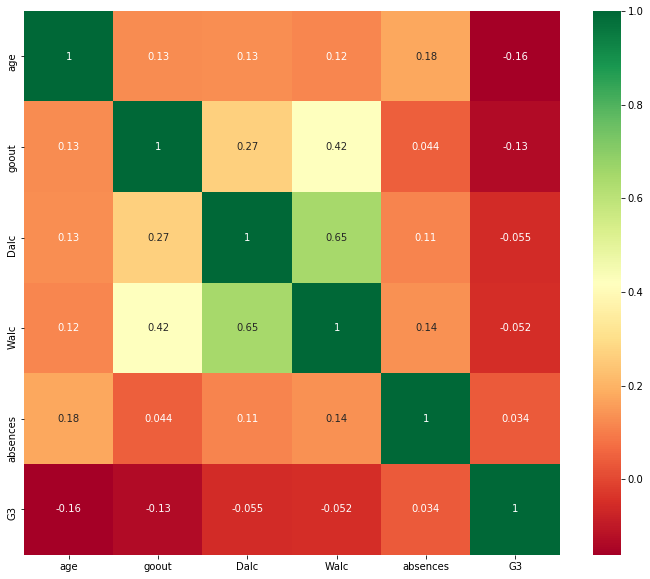

In [9]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

Lets observe some facts about the performance of a student academically if he/she is in romantic relation.

In [10]:
df_grp = df[['romantic','absences','G3']]

In [11]:
df_grp = df_grp.groupby(['romantic'],as_index=False).mean()

In [12]:
df_grp.head()

,romantic,absences,G3
0,no,4.840304,10.836502
1,yes,7.439394,9.575758


Text(0.5, 0, 'romantic')

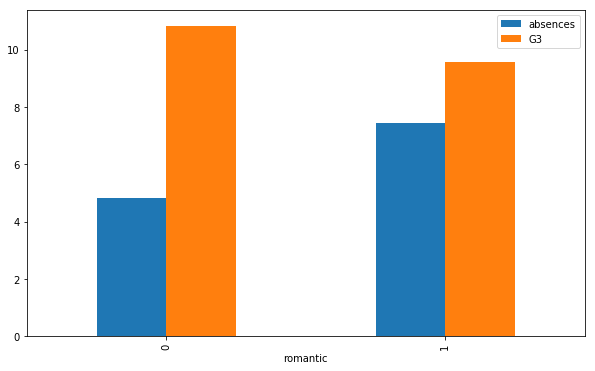

In [52]:
df_grp.plot(kind='bar' , figsize=(10,6), rot=90)
plt.xlabel('romantic')


We can see see that people who are generally in a relationship tends to leave classes more than those who are not.
It can also be seen that it might also affect their academic as G3(Final Grade) of students who are not in a relationship is more than those who are in a romantic relationship but the difference between the G3 of people in relation and those who are not does not differ that much , So it can be said that being in relation affects but not to all and not too much.

Now let's convert the string value of 'romantic' to int

In [16]:
romantic = {'no':0 , 'yes':1}
df.romantic = [romantic[item] for item in df.romantic] 

In [17]:
df_grp2 = df[['sex','romantic','absences','G3']]
df_grp2 =df_grp2.groupby(['sex'], as_index= False).mean()

In [18]:
df_grp2

,sex,romantic,absences,G3
0,F,0.379808,6.216346,9.966346
1,M,0.283422,5.144385,10.914439


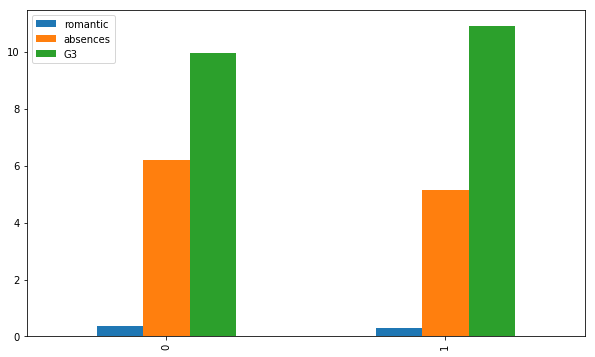

In [22]:
df_grp2.plot(kind='bar',figsize=(10,6), rot=90)

There is not that much different between the average grade and absences of male and female and there are more female in relation than men.

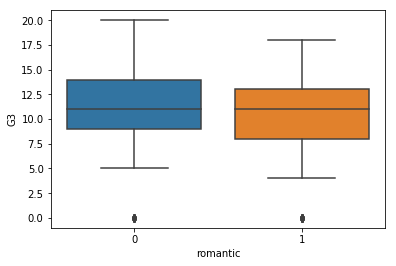

In [26]:
sns.boxplot(x="romantic",y="G3",data=df)

From boxplot it can be observed that the mean grade of the students whether in relation or not is almost same and generally the topper of the class are those who are not in a relationship as you can see that the max value of G3 of the people who are in relation is less and  those who are not, 20 is the Max Grade.

In [27]:
df['Dalc'] = df['Dalc'] + df['Walc']

Text(0, 0.5, 'Number of Students')

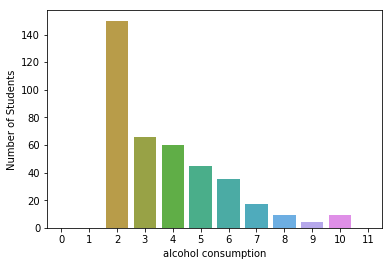

In [28]:
list=[]
for i in range(12):
    list.append(len(df[df.Dalc == i]))
ax= sns.barplot(x=[0,1,2,3,4,5,6,7,8,9,10,11], y=list) 
plt.xlabel('alcohol consumption')
plt.ylabel('Number of Students')

It can be seen that every one drinks at least twice in a week.

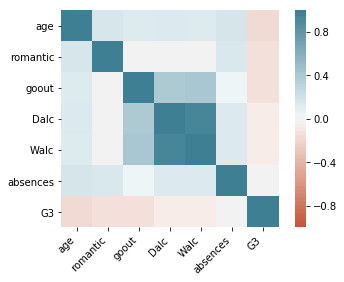

In [33]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Now lets examine some relations between romantic and dalc.

In [54]:
seriesObj = df.apply(lambda x: True if ((x['Dalc'] > 6 )) else False , axis=1)
 
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)
 
print('Number of Rows in dataframe in which Dalc > 6 : ', numOfRows)

Number of Rows in dataframe in which Dalc > 6 :  39


Now if I add one more condition that out of 39 people who drink more than 6 times a week amoung them how many are in romantic relation

In [53]:
seriesObj2 = df.apply(lambda x: True if ((x['Dalc'] > 6 ) & (x['romantic']== 1)) else False , axis=1)
 
# Count number of True in series
numOfRows2 = len(seriesObj2[seriesObj2 == True].index)
 
print('Number of Rows in dataframe in which Dalc > 6 and are in romantic relation : ', numOfRows2)

Number of Rows in dataframe in which Dalc > 6 and are in romantic relation :  14


As 14 out of 39 observation shows that a person in a romatic relation generally drinks less than those who are single, it can be observed that there is 35.8% chance that a person in relation might be a drinker and 64.2% chance that those who are single would be an excessive drinker.

Now lets examine the percent of male and female out of those 14 peoples who come inn the range of being an alchoholic.

In [55]:
seriesObj3 = df.apply(lambda x: True if ((x['Dalc'] > 6 ) & (x['romantic']== 1) & (x['sex']=='M')) else False , axis=1) 
# Count number of True in series
numOfRows3 = len(seriesObj3[seriesObj3 == True].index)
 
print('Number of Rows in dataframe in which Dalc > 6 , in romantic relation and is Male : ', numOfRows3)
print('Numer of rows in dataframe in which Dalc > 6 ,  in romantic relation and is Female : ', numOfRows2-numOfRows3)

Number of Rows in dataframe in which Dalc > 6 , in romantic relation and is Male :  12
Numer of rows in dataframe in which Dalc > 6 ,  in romantic relation and is Female :  2


People who comes in the category of being an alchoholic and are in relation is usually less in number and those who are is dominated by male as from the above data it can be seen that out of those 14 there are 12 men and only 2 women.